In [1]:
from expansion_tools.blob_expansion_tools_jetset import *
from jetset.data_loader import Data,ObsData
from jetset.plot_sedfit import PlotSED


## Notebook to run the simulations for

In [12]:
sed_data = ObsData(data_table=Data.from_file('sed_mrk421_mjd_56302.ecsv'))
from jetset.model_manager import  FitModel
fit_model=FitModel.load_model('processing/fit_model_lsb_mjd56302.pkl')

==> par: z_cosm from model: jet_leptonicacc_region linked to same parameter in model jet_leptonic
--------------------------------------------------------------------------------
JetTimeEvol model description
--------------------------------------------------------------------------------
 
physical setup: 

--------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,5.000000e+01,s,0.00029979245799999996,R/c,False
log. sampling,time,0.000000e+00,,None,,False
R/c,time,1.667820e+05,s,1.0,R/c,False
Diff coeff,,6.666667e-06,s-1,None,,False
Acc coeff,,4.000000e-05,s-1,None,,False
IC cooling,,off,,None,,False
Sync cooling,,on,,None,,False
Adiab. cooling,,on,,None,,False
Diff index,,2.000000e+00,,None,,False
Acc index,,1.000000e+00,s-1,None,,False



model parameters: 

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.000000e+06,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.000000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+08,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.500000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Acc,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,T_esc_acc,escape_time,(R_acc/c)*,3.000000e+00,--,--,False,True
jet_time_ev,T_esc_rad,escape_time,(R/c)*,1.000000e+60,--,--,False,True


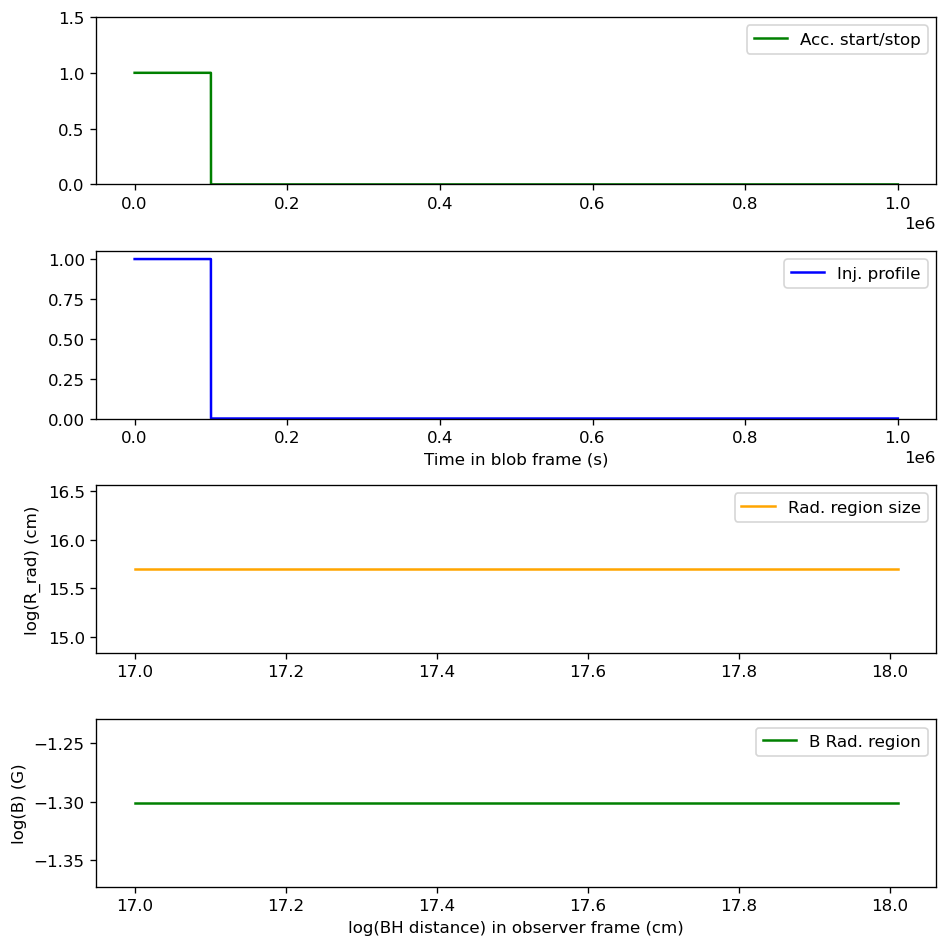

In [94]:
from jetset.jet_emitters_factory import InjEmittersFactory
q_inj=InjEmittersFactory().create_inj_emitters('pl',emitters_type='electrons',normalize=True)
q_inj.parameters.gmin.val=9
q_inj.parameters.gmax.val=10
q_inj.parameters.p.val=0.5
#OK
#OK
fit_model.jet_leptonic.parameters.beam_obj.val=30
fit_model.jet_leptonic.parameters.B.val=0.05
fit_model.jet_leptonic.parameters.R.val=5E15

flare_duration=1.0E5
duration=flare_duration*10
t_D0=1.5E5
t_A0=2.5E4
T_esc_rad=1E60
L_inj=5.0E39
E_acc_max=4E60
Delta_R_acc_ratio=0.1
B_ratio=1.0
#T_esc_acc=t_D0/(fit_model.jet_leptonic.parameters.R.val*Delta_R_acc_ratio/3E10)*5
T_esc_acc=t_A0/(fit_model.jet_leptonic.parameters.R.val*Delta_R_acc_ratio/3E10)*2
temp_ev_acc_flare = build_Temp_EV(duration=duration,
                                  Diff_Index=2,
                                  T_SIZE=2E4,
                                  flare_duration=flare_duration,
                                  delta_T=0,
                                  q_inj=q_inj,
                                  Delta_R_acc_ratio=Delta_R_acc_ratio,
                                  jet=fit_model.jet_leptonic, 
                                  show=False,
                                  B_acc_ratio=B_ratio,
                                  NUM_SET=200,
                                  L_inj=L_inj,
                                  t_D0=t_D0,
                                  t_A0=t_A0,
                                  T_esc_acc=T_esc_acc,
                                  T_esc_rad=T_esc_rad,
                                  E_acc_max=E_acc_max)
temp_ev_acc_flare.show_model()
temp_ev_acc_flare.plot_time_profile()

In [95]:
run=True
delta_t_out=1E3
rest_frame='obs'

temporal evolution running


  0%|          | 0/20000 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/200 [00:00<?, ?it/s]

caching SED for each saved distribution: done
caching SED for each saved distribution: start


  0%|          | 0/200 [00:00<?, ?it/s]

caching SED for each saved distribution: done


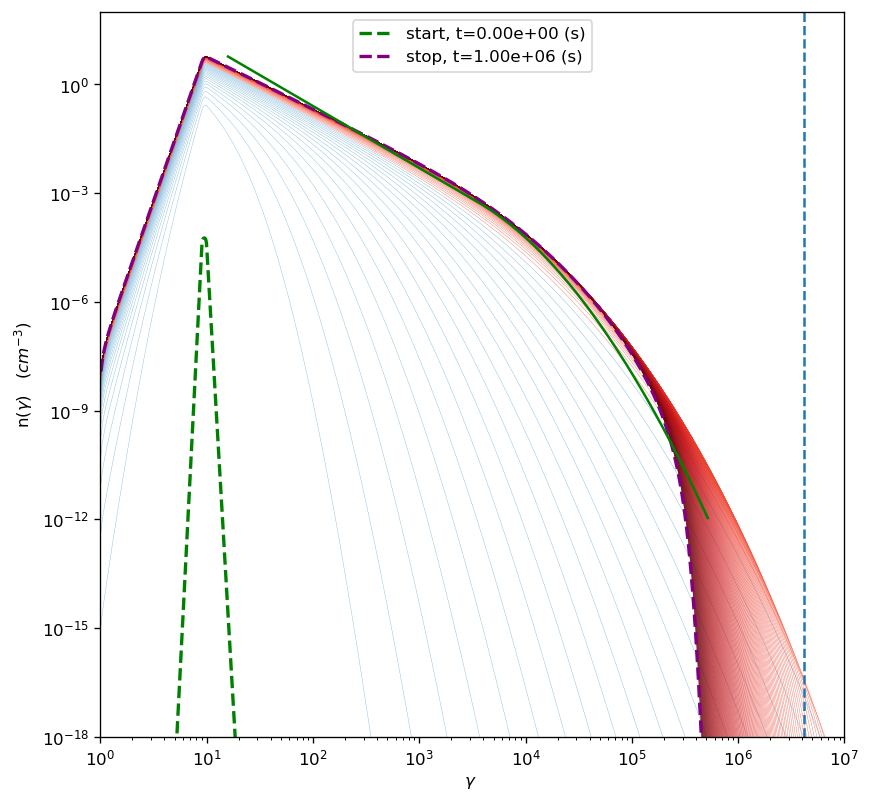

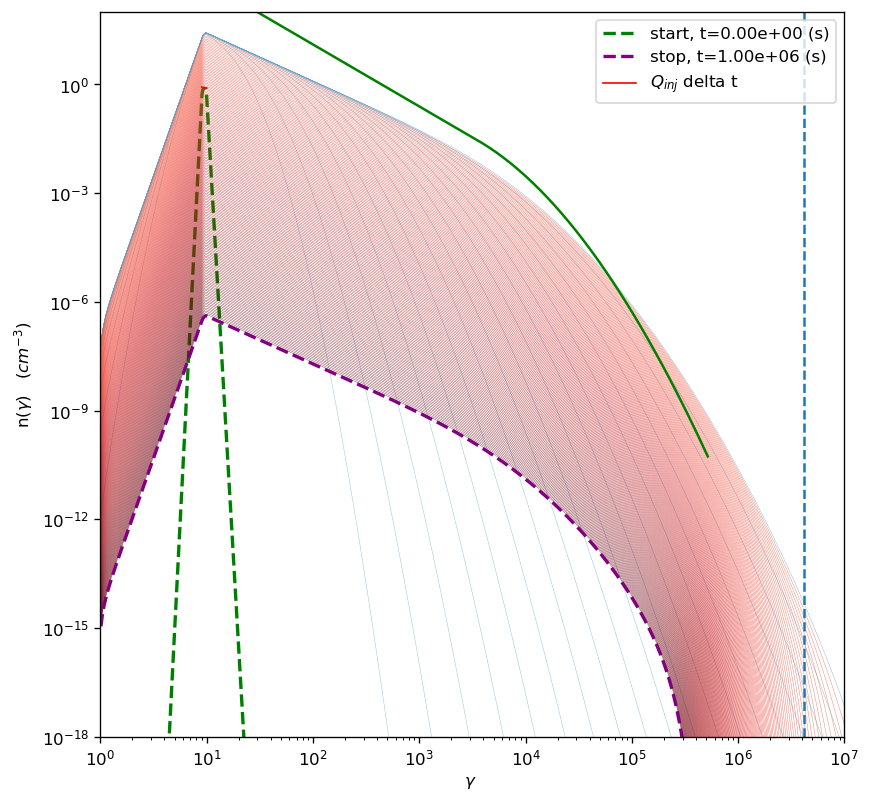

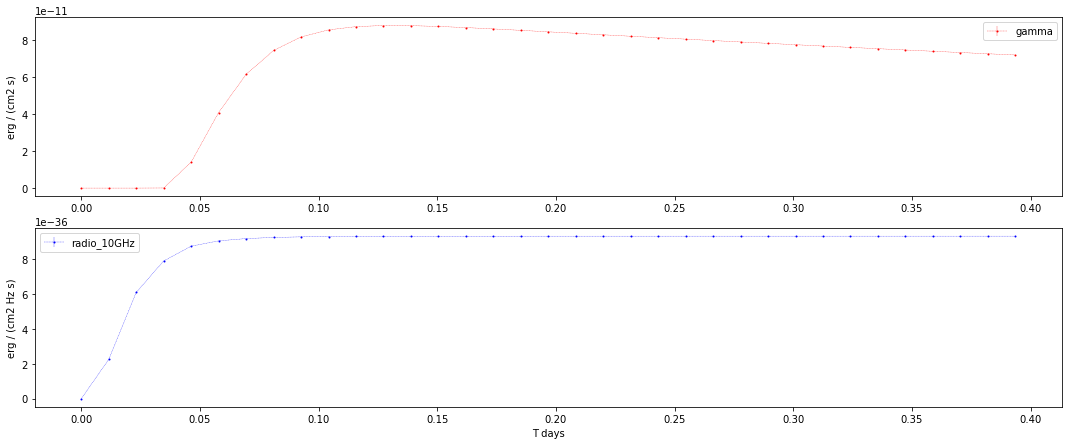

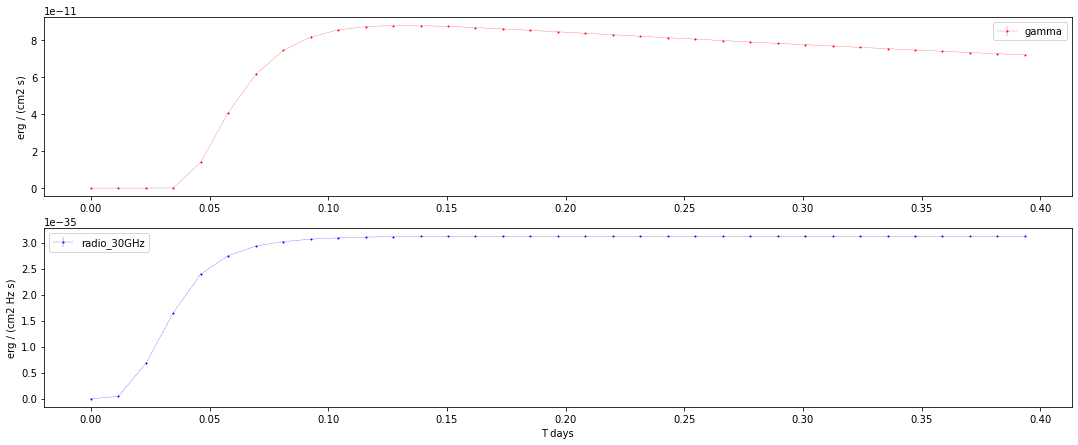

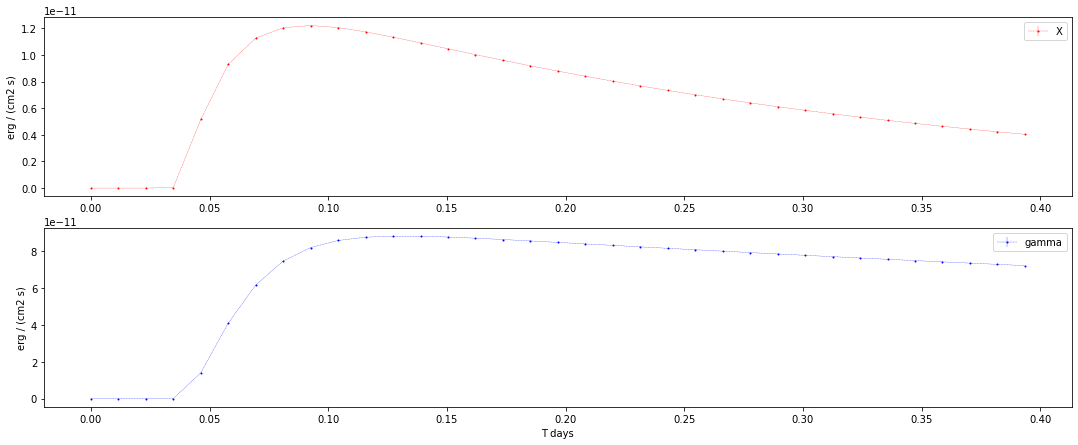

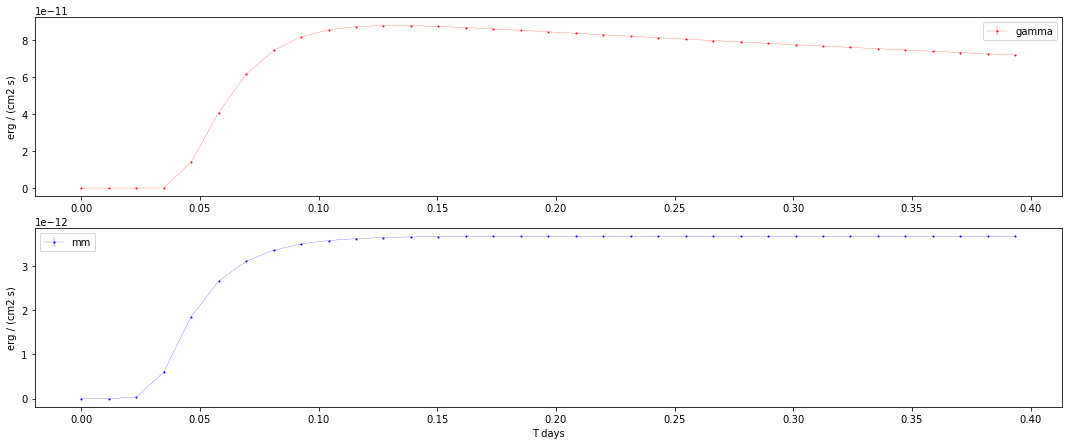

In [96]:
import pickle
if run is False:
    temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_exp_data_model_comparison/temp_ev_acc_flare.pkl')

lcs_only_flare=do_analysistemp_ev(temp_ev_acc_flare,
                                 sed_data,
                                 fit_model=fit_model,
                                 run=run,
                                 only_injection=True,
                                 do_injection=True,
                                 plot_fit_model=True,
                                 plot_fit_distr=True,
                                 plot_emitters=True,
                                 plot_lcs=True,
                                 delta_t_out=delta_t_out,
                                 eval_cross_time=False,
                                 rest_frame='obs')

with open('temp_ev_sim_exp_data_model_comparison/lc_%s_flare.pkl'%(rest_frame), 'wb') as f:
    pickle.dump(lcs_only_flare, f, pickle.HIGHEST_PROTOCOL)

if run is True:
    temp_ev_acc_flare.save_model('temp_ev_sim_exp_data_model_comparison/temp_ev_acc_flare.pkl')

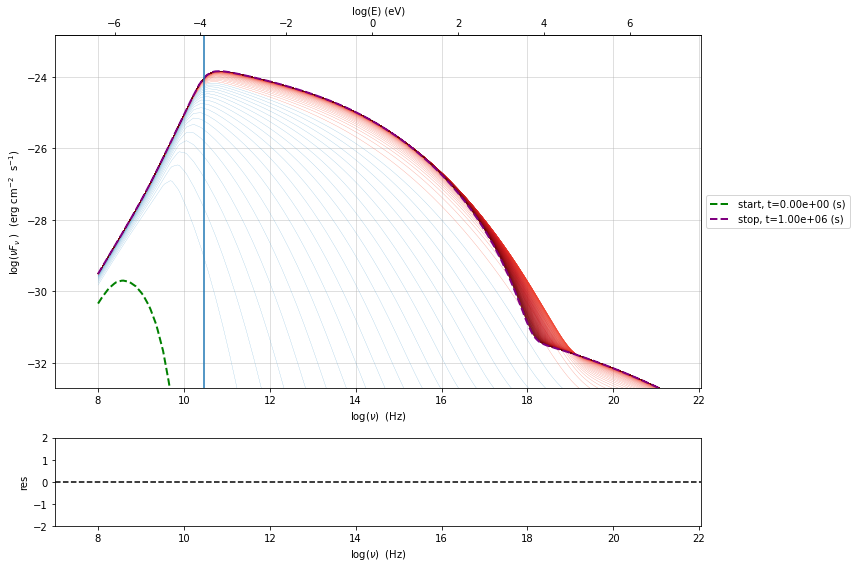

In [97]:
temp_ev_acc_flare.set_time(time_slice=-1)
p=temp_ev_acc_flare.plot_tempev_model(region='rad',use_cached=True,sed_data=None,density=True)
p.sedplot.axvline(np.log10(30E09))

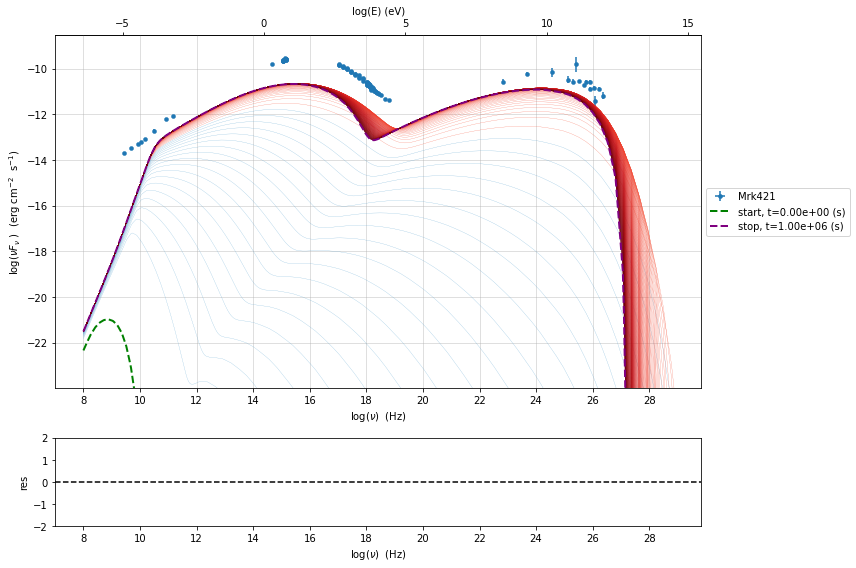

In [98]:
p=temp_ev_acc_flare.plot_tempev_model(region='rad',use_cached=True,sed_data=sed_data,density=False)


In [78]:
rest_frame='obs'
delta_t_out=1E3
t_exp=1.268512E8

In [81]:
from jetset.jet_timedep import JetTimeEvol
temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_exp_data_model_comparison/temp_ev_acc_flare.pkl')
R0=temp_ev_acc_flare.rad_region.jet.parameters.R.val

def delta_t_est(t_exp,R0,beta_exp):
    return t_exp+R0/(beta_exp*3E10)

def t_dec_est(R0,a,beta_exp):
    return ((R0+beta_exp*3E10)*np.power(beta_exp*3E10,a))

beta_exp=np.linspace(4E-3,6E-3,3)

print(R0/1E15,temp_ev_acc_flare.rad_region.jet.parameters.beam_obj.val,temp_ev_acc_flare.rad_region.jet.parameters.z_cosm.val)

5.0 30 0.0308


In [82]:
beta_exp

array([0.004, 0.005, 0.006])

In [99]:
beta_exp=[0.002,0.003]

Set `run=False` if you have already run the simulations, and you want only to regenerate lcs or SEDs

In [100]:
run=True
for ID,v in enumerate(beta_exp):
    duration=delta_t_est(t_exp,R0,v)+10*t_dec_est(R0,-1,v)
    T_SIZE=np.int(duration/1000)
    NUM_SET=np.int(T_SIZE)
    NUM_SET=min(5000,NUM_SET)
    NUM_SET=max(1000,NUM_SET)
    NUM_SET=1000
    print('ID',ID)
    print('beta_exp %f'%v)
    print('delta_t  est. %e (d)'%(delta_t_est(t_exp,R0,v)/86400))
    print('t_dec  est. %e (d)'%(t_dec_est(R0,-1,v)/86400))
    print('delta_t  est. %e (s)'%(delta_t_est(t_exp,R0,v)))
    print('t_dec  est. %e (s)'%(t_dec_est(R0,-1,v)))
    print('duration %e'%duration)
    print('T_SIZE %d'%T_SIZE)
    print('NUM_SET %d'%NUM_SET)
    run_adiabatic_exp(sed_data,
                      fit_model,
                      'temp_ev_sim_exp_data_model_comparison',
                      temp_ev_acc_flare,
                      flare_duration=0,
                      duration=duration,
                      delta_t_out=delta_t_out,
                      T_esc_rad=1E60,
                      rest_frame=rest_frame,
                      T_SIZE=T_SIZE,
                      NUM_SET=NUM_SET,
                      run=run,
                      beta_exp=v,
                      t_exp=t_exp)
    
   
    print('----------------------------------------------')

ID 0
beta_exp 0.002000
delta_t  est. 2.432691e+03 (d)
t_dec  est. 9.645062e+02 (d)
delta_t  est. 2.101845e+08 (s)
t_dec  est. 8.333333e+07 (s)
duration 1.043518e+09
T_SIZE 1043517
NUM_SET 1000
==> par: z_cosm from model: jet_leptonicacc_region linked to same parameter in model jet_leptonic
temporal evolution running


  0%|          | 0/1043517 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/1000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
126851200.0 126851200.0 1043517876.6666665
t1=121 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=121 t2=111, t2_R=1.169e+08, R2=5.00000e+15 t/t_ref=0.914 t/t_exp=0.914 t/duration=0.112 1.00000e+00
t1=121 t2=222, t2_R=2.327e+08, R2=1.13468e+16 t/t_ref=1.828 t/t_exp=1.828 t/duration=0.223 1.00004e+00
t1=121 t2=333, t2_R=3.485e+08, R2=1.82918e+16 t/t_ref=2.742 t/t_exp=2.742 t/duration=0.334 1.00004e+00
t1=121 t2=444, t2_R=4.644e+08, R2=2.52369e+16 t/t_ref=3.656 t/t_exp=3.656 t/duration=0.445 9.99728e-01
t1=121 t2=555, t2_R=5.802e+08, R2=3.21819e+16 t/t_ref=4.570 t/t_exp=4.570 t/duration=0.556 9.96495e-01
t1=121 t2=666, t2_R=6.960e+08, R2=3.91269e+16 t/t_ref=5.484 t/t_exp=5.484 t/duration=0.667 9.81256e-01
t1=121 t2=777, t2_R=8.119e+08, R2=4.60720e+16 t/t_ref=6.398 t/t_exp=6.398 t/duration=0.778 9.47056e-01
t1=121 t2=888, t2_R=9.277e+08, R2=5.30170e+16 t/t_ref=7.312 t/t_exp=7.312 t/duration=0.

  0%|          | 0/737962 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/1000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
126851200.0 126851200.0 737962321.1111112
t1=171 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00001e+00
t1=171 t2=111, t2_R=8.265e+07, R2=5.00000e+15 t/t_ref=0.646 t/t_exp=0.646 t/duration=0.112 1.00001e+00
t1=171 t2=222, t2_R=1.646e+08, R2=8.39199e+15 t/t_ref=1.293 t/t_exp=1.293 t/duration=0.223 1.00004e+00
t1=171 t2=333, t2_R=2.465e+08, R2=1.57592e+16 t/t_ref=1.939 t/t_exp=1.939 t/duration=0.334 1.00007e+00
t1=171 t2=444, t2_R=3.284e+08, R2=2.31263e+16 t/t_ref=2.586 t/t_exp=2.586 t/duration=0.445 9.99947e-01
t1=171 t2=555, t2_R=4.103e+08, R2=3.04934e+16 t/t_ref=3.232 t/t_exp=3.232 t/duration=0.556 9.97962e-01
t1=171 t2=666, t2_R=4.922e+08, R2=3.78606e+16 t/t_ref=3.878 t/t_exp=3.878 t/duration=0.667 9.85501e-01
t1=171 t2=777, t2_R=5.741e+08, R2=4.52277e+16 t/t_ref=4.525 t/t_exp=4.525 t/duration=0.778 9.52226e-01
t1=171 t2=888, t2_R=6.560e+08, R2=5.25949e+16 t/t_ref=5.171 t/t_exp=5.171 t/duration=0.8

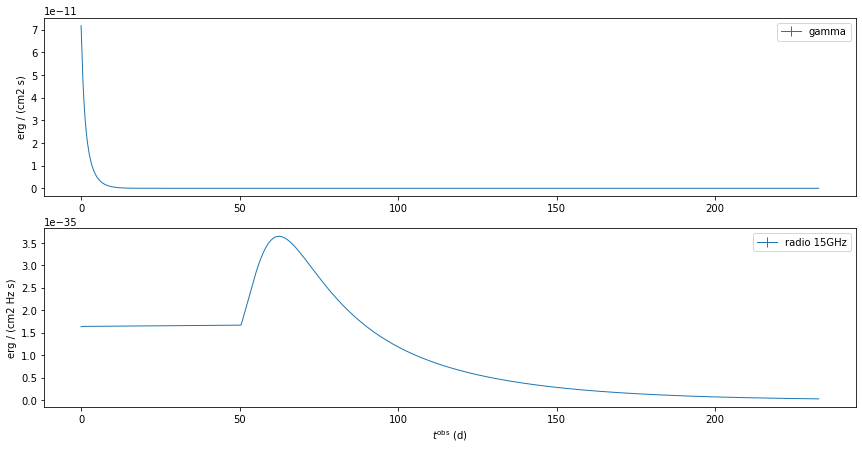

In [86]:
from expansion_tools.delay_analysis import plot_lcs

p=plot_lcs(exp_lcs='temp_ev_sim_exp_data_model_comparison/lc_obs_beta_exp=0.004.pkl',lcs_names=['lg_obs','lr_obs_15GHz'],flare_lcs=None)


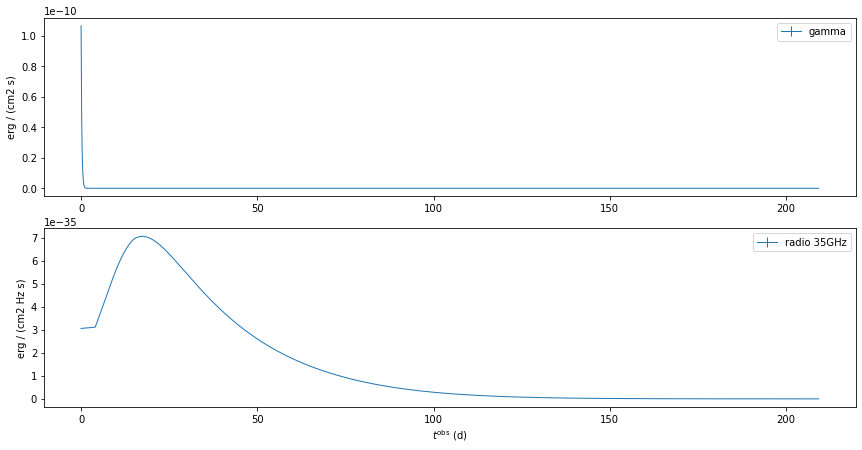

In [68]:
p=plot_lcs(exp_lcs='temp_ev_sim_exp_change_beta/lc_obs_beta_exp=0.004.pkl',lcs_names=['lg_obs','lr_obs_35GHz'],flare_lcs=None)


In [35]:
temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_exp_data_model_comparison/temp_ev_acc_flare.pkl')


In [48]:
temp_ev_acc_flare.show_model()

--------------------------------------------------------------------------------
JetTimeEvol model description
--------------------------------------------------------------------------------
 
physical setup: 

--------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,5.000000e+01,s,0.00029979245799999996,R/c,False
log. sampling,time,0.000000e+00,,None,,False
R/c,time,1.667820e+05,s,1.0,R/c,False
Diff coeff,,6.666667e-06,s-1,None,,False
Acc coeff,,4.000000e-05,s-1,None,,False
IC cooling,,off,,None,,False
Sync cooling,,on,,None,,False
Adiab. cooling,,on,,None,,False
Diff index,,2.000000e+00,,None,,False
Acc index,,1.000000e+00,s-1,None,,False



model parameters: 

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.000000e+06,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.000000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+08,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.500000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Acc,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,T_esc_acc,escape_time,(R_acc/c)*,3.000000e+00,--,--,False,True
jet_time_ev,T_esc_rad,escape_time,(R/c)*,1.000000e+60,--,--,False,True


In [50]:
temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_exp_data_model_comparison/temp_ev_expansion_beta_exp=0.004.pkl')


In [51]:
temp_ev_acc_flare.show_model()

--------------------------------------------------------------------------------
JetTimeEvol model description
--------------------------------------------------------------------------------
 
physical setup: 

--------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,1.000001e+03,s,0.005995852695047606,R/c,False
log. sampling,time,0.000000e+00,,None,,False
R/c,time,1.667820e+05,s,1.0,R/c,False
Diff coeff,,1.000000e-05,s-1,None,,False
Acc coeff,,1.000000e-04,s-1,None,,False
IC cooling,,off,,None,,False
Sync cooling,,on,,None,,False
Adiab. cooling,,on,,None,,False
Diff index,,2.000000e+00,,None,,False
Acc index,,1.000000e+00,s-1,None,,False



model parameters: 

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,5.823333e+08,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.000000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+08,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.500000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,T_esc_acc,escape_time,(R_acc/c)*,1.500000e+01,--,--,False,True
jet_time_ev,T_esc_rad,escape_time,(R/c)*,1.000000e+60,--,--,False,True
